# How to speak "MPL"

The previous sections covered some of the structure and syntax of Matplotlib, but substance and vocabulary of the library offers more control over your plotting.
In this section, we will go over many of the properties of the library. The following modules exemplify one way of setting a particular property, and that property may be applicible elsewhere in completely different context. This is the "language" of Matplotlib.

# Colors
Colors are a key vocabulary in Matplotlib, as colors are associated with everything that is plotted in a figure. Matplotlib supports a [very robust language](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) for specifying colors that should be familiar to a wide variety of users.

### Colornames
Colors are typically inputted as strings. For  basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse". Here is a comprehensive [list](https://www.w3schools.com/Colors/colors_names.asp) of 140 color names. 

Matplotlib supports the [xkcd color names](https://xkcd.com/color/rgb/) prefxed by `'xkcd:'`.

Matplotlib also understands  `{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}` which are the Tableau Colors from the ‘T10’ categorical palette (and the default color cycle);

### Hex values
Colors can also be specified by supplying a HTML/CSS hex string, such as `'#0000FF'` for blue. 

### 256 Shades of Gray
A gray level can be given instead of a color by passing a string representation of a number between 0 and 1, inclusive. `'0.0'` is black, while `'1.0'` is white. `'0.75'` would be a light shade of gray.

### RGB[A] tuples
You may come upon instances where the previous ways of specifying colors do not work. When all else fails, the universal language of colors for matplotlib is the RGB[A] tuple. This is the "Red", "Green", "Blue", and sometimes "Alpha" tuple of floats in the range of [0, 1]. One means full saturation of that channel, so a red RGBA tuple would be `(1.0, 0.0, 0.0, 1.0)` (Red, Green, Blue, Alpha), whereas a partly transparent green RGBA tuple would be `(0.0, 1.0, 0.0, 0.75)`.  The documentation will usually specify whether it accepts RGB or RGBA tuples. 

In functions such as `plot()` and `scatter()`, which are some of the most commonly used plotting functions for us, they require a "format specification", which includes color as part of the format and are string only.

Oftentimes there is a separate argument for "alpha" where-ever you can specify a color. The value for "alpha" will usually take precedence over the alpha value in the RGBA tuple. There is no easy way around this inconsistency.



In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Examples
Try out some different string representations of colors (you can't do RGB[A] tuples here).

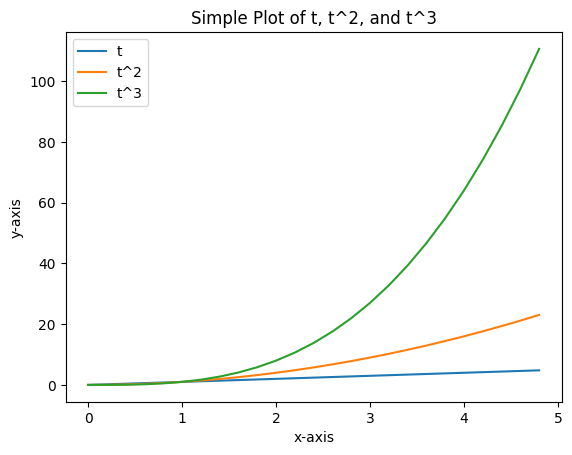

In [2]:
t = np.arange(0.0, 5.0, 0.2) # create an array of values from 0.0 to 5.0 with a step of 0.2

#set up the plot using fig, ax = plt.subplots()
fig, ax = plt.subplots()
ax.plot(t, t, t, t**2, t, t**3, ) # plot t,t | t, t^2, and t, t^3
ax.set_xlabel('x-axis') # label for x-axis
ax.set_ylabel('y-axis') # label for y-axis
ax.set_title('Simple Plot of t, t^2, and t^3') # title of the plot
ax.legend(['t', 't^2', 't^3']) # legend for the plot
plt.show()

In this format, we do not have much control over the colors. Matplotlib automatically chooses them for us. 
Most of the time, we want control in setting our colors for our data. Lets look at a few ways to do this.

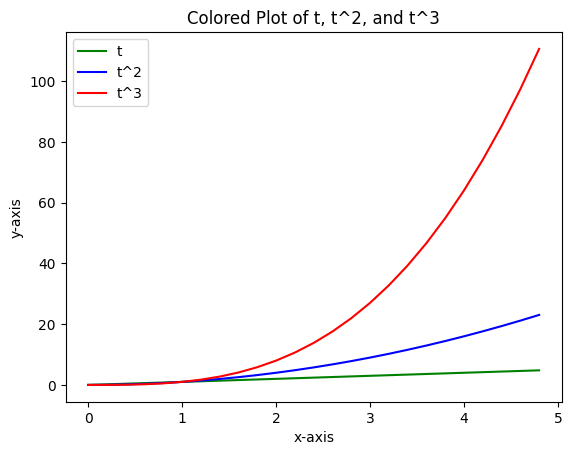

In [3]:
#set up the plot using fig, ax = plt.subplots()
fig, ax = plt.subplots()

#add a plot of one of the above functions and specify a color 
ax.plot(t, t, color='green') # plot t vs t in green color
ax.plot(t, t**2, color='blue') # plot t vs t^2 in blue color
ax.plot(t, t**3, color='red') # plot t vs t^3 in red color
ax.set_xlabel('x-axis') # label for x-axis
ax.set_ylabel('y-axis') # label for y-axis
ax.set_title('Colored Plot of t, t^2, and t^3') # title of the plot
ax.legend(['t', 't^2', 't^3']) # legend for the plot

plt.show()

The above methods works, but is very "manual" and repetitive. We can use the power of Python to recreate the same figure more "programatically."

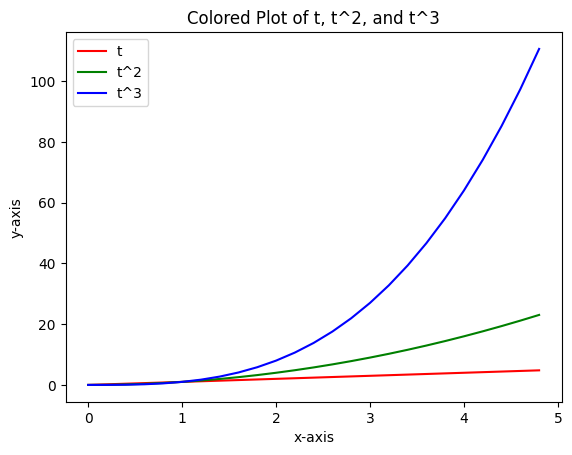

In [3]:
# Programmatic version using a for loop and list of colors
colors = ['r', 'g', 'b']  # Define a list of colors: red, green, blue - try changing the color
functions = [t, t**2, t**3]  # Create a list of the functions: t, t squared, t cubed
labels = ['t', 't^2', 't^3']  # Create a list of labels matching the functions

fig, ax = plt.subplots()  # Create a figure and axes object

 # Loop over each color, function, and label, the zip function links each color, function, and label together in their respective order
for color, func, label in zip(colors, functions, labels): 
    ax.plot(t, #t is the same x axis for all functions
            func, # calling the function from the functions list that is looped through
            color=color, # calling the colors zipped to the function in the for loop
            label=label)  # calling the label that is zipped with the color,function in the for loop

ax.set_xlabel('x-axis')  # Set the x-axis label
ax.set_ylabel('y-axis')  # Set the y-axis label
ax.set_title('Colored Plot of t, t^2, and t^3')  # Set the plot title
ax.legend()  # Add a legend to the plot

plt.show()  # Display the plot

While the above method is not necessarilly shorter in code length, it promotes automation and quick changes.

# Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  | marker    |  description    | marker   |  description  | marker    |  description  
:----------|:--------------|:----------|:----------------|:---------|:--------------|:----------|:--------------
"."        |  point        | "+"       |  plus           | ","      |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        | "d"      |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         | "p"      |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line |  "h"     |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      | "<"      | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     | ">"      | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        | "^"      | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      | "v"      | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        | " "      |  nothing      | ""        |  nothing

In [4]:
#generate a grid of markers to display
xs, ys = np.mgrid[:4, 9:0:-1] # create a meshgrid for plotting markers
#see the data
print('xs array:', xs)
print('ys array:', ys)

xs array: [[0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3]]
ys array: [[9 8 7 6 5 4 3 2 1]
 [9 8 7 6 5 4 3 2 1]
 [9 8 7 6 5 4 3 2 1]
 [9 8 7 6 5 4 3 2 1]]


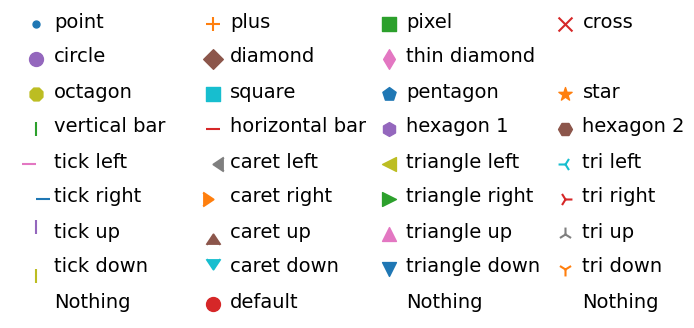

In [5]:
#list of markers and their descriptions
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]

descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "default", "Nothing", "Nothing"]

#plot the markers with descriptions
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4)) # create a figure and axis for plotting, 1 row, 1 column, size 7.5x4 inches

#iterate through the grid and plot each marker with its description. Zipping the xs and xy arrays to the markers and descripts
for x, y, m, d in zip(xs.T.flat, ys.T.flat, markers, descripts): 
    # plot each marker at the grid position, x is the x-coordinate, y is the y-coordinate, m is the marker style, s is the size
    ax.scatter(x, y, marker=m, s=100) 
    # add text description next to each marker, x + 0.1 is the x-coordinate for text, y - 0.1 is the y-coordinate for text, d is the description, size is the font size
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off() # turn off the axis, this removes the ticks and labels
plt.show()


Try out some different markers and colors

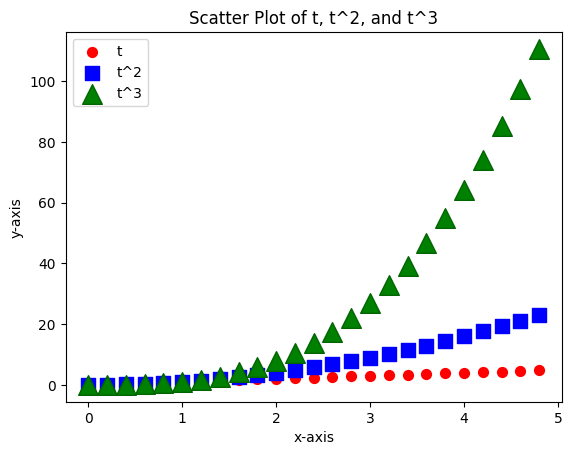

In [6]:
# Use the t data to make scatter plots rather than line plots
fig, ax = plt.subplots()  # Create figure and axes objects

# Plot t vs t with circle markers in red        
ax.scatter(t, t, # enter the x and y data
           marker='o', # circle marker
           color='red', # red for the marker color
           s=50, # s controls marker size
           label='t' # label for the legend
           )  

# Plot t vs t^2 with square markers in blue
ax.scatter(t, t**2, # enter the x and y data, t**2 means t squared
           marker='s', # square marker
           color='blue', # blue for the marker color
           s=100, # set marker size to 100 points
           label='t^2' # label for the legend
           )  

# Plot t vs t^3 with triangle markers in green
ax.scatter(t, t**3, # enter the x and y data, t**3 means t cubed
           marker='^', # '^' creates upward triangle
           color='green', # green color
           s=200, # set marker size to 200 points 
           edgecolors='darkgreen', # dark green edge
           label='t^3' # label for the legend
           )  

ax.set_xlabel('x-axis')  # Label for x-axis 
ax.set_ylabel('y-axis')  # Label for y-axis
ax.set_title('Scatter Plot of t, t^2, and t^3')  # Title for the plot
ax.legend(loc='upper left')  # Display legend with labels, put the legend in the upper left corner

plt.show()  # Display the plot

Make the same plot as above but more **Pythonic**

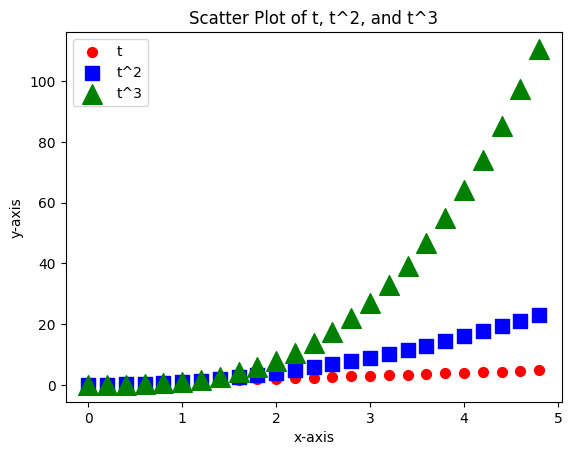

In [7]:
#make the same scatter plot but use a for loop to reduce code repetition
fig, ax = plt.subplots()  # Create figure and axes objects

# Define lists for markers, colors, sizes, functions, and labels
markers = ['o', 's', '^']  # circle, square, triangle
colors = ['red', 'blue', 'green']  # red, blue, green
sizes = [50, 100, 200]  # sizes for each marker
functions = [t, t**2, t**3]  # functions to plot
labels = ['t', 't^2', 't^3']  # labels for the legend   

# Loop over each marker, color, size, function, and label
for marker, color, size, func, label in zip(markers, colors, sizes, functions, labels):
    ax.scatter(t,  # x data is always t
               func,  # y data from the functions list
               marker=marker,  # marker style from the markers list
               color=color,  # color from the colors list
               s=size,  # size from the sizes list
               label=label  # label from the labels list
               )    
ax.set_xlabel('x-axis')  # Label for x-axis 
ax.set_ylabel('y-axis')  # Label for y-axis
ax.set_title('Scatter Plot of t, t^2, and t^3')  # Title for the plot
ax.legend(loc='upper left')  # Display legend with labels, put the legend in the upper left corner
plt.show()  # Display the plot

# Linestyles
Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

# Extra Fancy: Mathtext!
Matplotlib provides a very easy way to add math functions for those familiar with LaTeX. Any text that is surrounded by dollar signs will be treated as "[mathtext](http://matplotlib.org/users/mathtext.html#mathtext-tutorial)". Do note that because backslashes are prevelent in LaTeX, it is often a good idea to prepend an `r` to your string literal so that Python will not treat the backslashes as escape characters.

We will apply **Mathtext** to our labels.

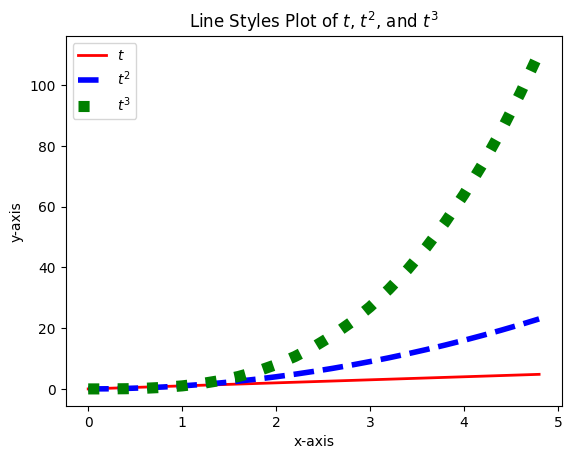

In [8]:
#make the same plot as above but use plot and use different line styles
fig, ax = plt.subplots()  # Create figure and axes objects

# Plot t vs t with solid line in red
ax.plot(t, t, # plot t vs t
        linestyle='-', # solid line style
        color='red', # red color
        label=r'$t$', # label for the legend with math formatting in LaTeX
        linewidth=2 # set line width to 2
        )  

# Plot t vs t^2 with dashed line in blue
ax.plot(t, t**2, # plot t vs t squared
        linestyle='--', # dashed line style
        color='blue', # blue color
        label=r'$t^2$', # label with superscript 2 with math formatting in LaTeX
        lw=4 # thicker line width to 4, lw is shorthand for linewidth
        )  

# Plot t vs t^3 with dotted line in green
ax.plot(t, t**3, # plot t vs t cubed
        linestyle=':', # dotted line style
        color='green', # green color
        label=r'$t^3$', # label with superscript 3 with math formatting in LaTeX
        lw=8 # thicker line width to 8, lw is shorthand for linewidth
        )  

#add labels, title, and legend
ax.set_xlabel('x-axis')  # Label for x-axis
ax.set_ylabel('y-axis')  # Label for y-axis
ax.set_title(r'Line Styles Plot of $t$, $t^2$, and $t^3$')  # Title with superscripts in math mode via LaTeX
ax.legend(loc='upper left')  # Display legend with labels, put the legend in the upper left corner
plt.show()  # Display the plot

Again, the same figure in a more Pythonic manner

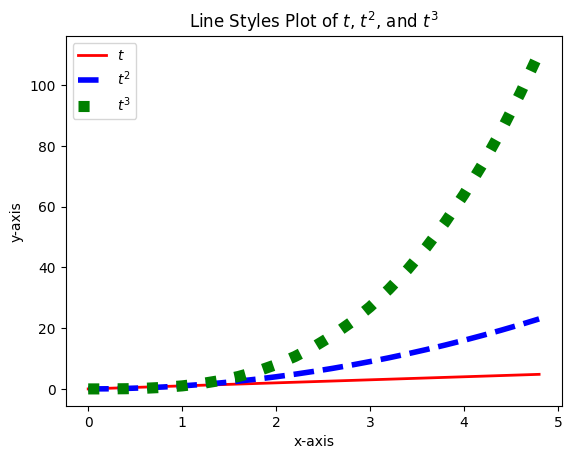

In [9]:
#same plot as above but use a for loop to reduce code repetition 
linestyles = ['-', '--', ':']  # Define line styles: solid, dashed, dotted
colors = ['red', 'blue', 'green']  # Define colors: red, blue, green
functions = [t, t**2, t**3]  # Create a list of the functions: t, t squared, t cubed
labels = [r'$t$', r'$t^2$', r'$t^3$']  # Create a list of labels matching the functions
linewidths = [2, 4, 8]  # Define line widths for each function

fig, ax = plt.subplots()  # Create figure and axes objects 
for linestyle, color, func, label, lw in zip(linestyles, colors, functions, labels, linewidths):
    ax.plot(t,  # x data is always t
            func,  # y data from the functions list
            linestyle=linestyle,  # line style from the linestyles list
            color=color,  # color from the colors list
            label=label,  # label from the labels list
            linewidth=lw  # line width from the linewidths list
            )
            
ax.set_xlabel('x-axis')  # Label for x-axis
ax.set_ylabel('y-axis')  # Label for y-axis
ax.set_title(r'Line Styles Plot of $t$, $t^2$, and $t^3$')  # Title for the plot, with superscripts in math mode via LaTeX
ax.legend(loc='upper left')  # Display legend with labels, put the legend in the upper left corner
plt.show()  # Display the plot

### Applying linestle, color, width commands to other plot types

In [10]:
#make some data

#label the bins
x = [1, 2, 3, 4, 5]  # x positions for the bars
#height of the bars for each dataset
y = [10, 20, 15, 13, 6]  # heights for dataset 1


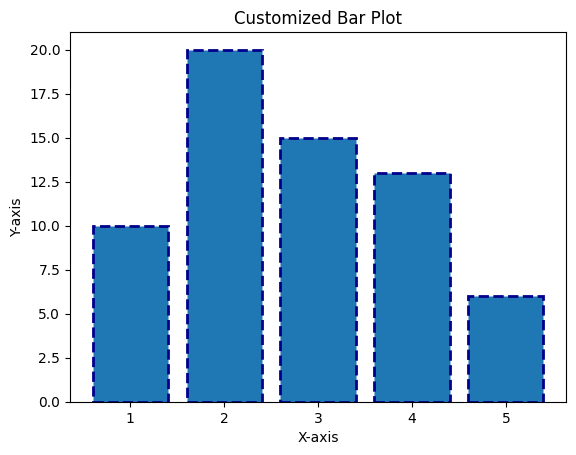

In [11]:
#make a bar plot with customizations
fig, ax = plt.subplots(1, 1)
#Appl the bar plot with custom line style, edge color, and line width
ax.bar(x, y, # x positions and heights
       ls='--', # dashed line style for the edges
       ec='darkblue', # darkblue edge color
       lw=2 # line width of 2 for the edges
       )

#add labels and title
ax.set_xlabel('X-axis')  # Label for x-axis
ax.set_ylabel('Y-axis')  # Label for y-axis
ax.set_title('Customized Bar Plot')  # Title for the plot
plt.show()

# Plot attributes
Matplotlib enable the user to input attributes that can make the lines and markers suit your needs. Generally, Matplotlib will cycle the colors for each dataset you plot. However, you are free to explicitly state which colors you want used for which plots. For [`plt.plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot), you can mix the specification for the colors, linestyles, and markers in a single string.

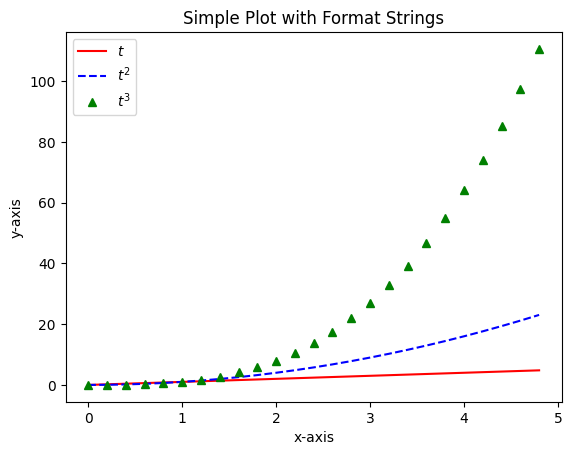

In [12]:

# red dashes, blue squares and green triangles
fig, ax = plt.subplots()
ax.plot(t, t, 'r-', # red  line for t
        t, t**2, 'b--', # blue dashed line for t^2
        t, t**3, 'g^' # green triangle markers for t^3
        )
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Simple Plot with Format Strings')
ax.legend([r'$t$', r'$t^2$', r'$t^3$'], loc ='upper left') # legend for the plot using math formatting in LaTeX, in the same order as the plots

plt.show()

| Property               | Value Type                                      
|------------------------|-------------------------------------------------
|alpha                   | float                                           
|color or c              | any matplotlib color                            
|dash_capstyle           | ['butt', 'round' 'projecting']               
|dash_joinstyle          | ['miter' 'round' 'bevel']
|dashes                  | sequence of on/off ink in points                
|drawstyle               | [ ‘default’ ‘steps’ ‘steps-pre’
|                        |   ‘steps-mid’ ‘steps-post’ ]
|linestyle or ls         | [ '-' '--' '-.' ':' 'None' ' ' ''] 
|                        | and any drawstyle in combination with a         
|                        | linestyle, e.g. 'steps--'.                      
|linewidth or lw         | float value in points                           
|marker                  | [ 0 1 2 3 4 5 6 7 'o' 'd' 'D' 'h' 'H'
|                        |  '' 'None' ' ' `None` '8' 'p' ','
|                        |  '+' 'x' '.' 's' '\*' '\_' '&#124;'
|                        |  '1' '2' '3' '4' 'v' '<' '>' '^' ]
|markeredgecolor or mec  | any matplotlib color
|markeredgewidth or mew  | float value in points
|markerfacecolor or mfc  | any matplotlib color
|markersize or ms        | float
|solid_capstyle          | ['butt' 'round' 'projecting']
|solid_joinstyle         | ['miter' 'round' 'bevel']
|visible                 | [`True` `False`]
|zorder                  | any number


Make a plot that has a dotted red line, with large yellow diamond markers that have a green edge

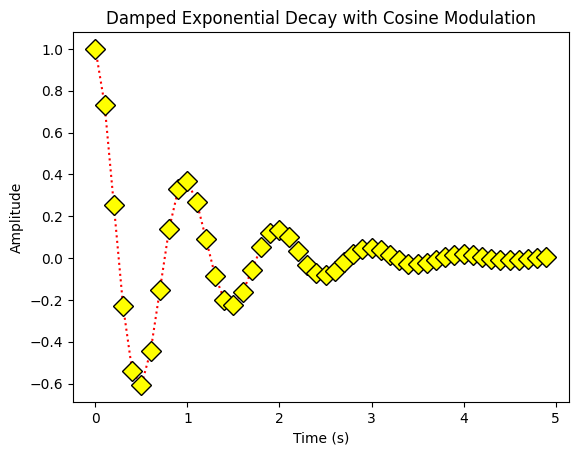

In [13]:
t = np.arange(0.0, 5.0, 0.1)
a = np.exp(-t) * np.cos(2*np.pi*t)

#make a plot that has a dotted red line, with large yellow diamond markers with black edges
fig, ax = plt.subplots()
ax.plot(t, a,
        'r:', # red dotted line, connects the data points
        marker='D', # diamond markers, occurs at each data point by default
        markerfacecolor='yellow', # yellow fill for the markers
        markeredgecolor='black', # black edge for the markers
        markersize=10 # size of the markers
        )
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Damped Exponential Decay with Cosine Modulation')
plt.show()

# Colormaps
Colormaps are a very important property of many figures, relating a scalar value to a color. In addition to the regular portion of the colormap, an "over", "under" and "bad" color can be optionally defined as well. NaNs will trigger the "bad" part of the colormap.

Your choice in which colormap to use depends on what you are displaying. In mpl, the "viridis" colormap has historically been used by default, but it will often not be the colormap you would want to use. 

 Nathaniel Smith and Stéfan van der Walt for developed new perceptually uniform colormaps such as viridis. [Here is the talk](https://www.youtube.com/watch?v=xAoljeRJ3lU) they gave at SciPy 2015 that does an excelent job explaining colormaps.


## Colormap reference


Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

**Sequential:**

<div style="margin-left: 40px;">
These colormaps are approximately monochromatic colormaps varying smoothly between two color tones---usually from low saturation (e.g. white) to high saturation (e.g. a bright blue). Sequential colormaps are ideal for representing most scientific data since they show a clear progression from low-to-high values.
</div>

**Diverging:**

<div style="margin-left: 40px;">
These colormaps have a median value (usually light in color) and vary smoothly to two different color tones at high and low values. Diverging colormaps are ideal when your data has a median value that is significant (e.g.  0, such that positive and negative values are represented by different colors of the colormap).
</div>

**Qualitative:**

<div style="margin-left: 40px;">
These colormaps vary rapidly in color. Qualitative colormaps are useful for choosing a set of discrete colors. For example:

`color_list = plt.cm.Set3(np.linspace(0, 1, 12))`

gives a list of RGB colors that are good for plotting a series of lines on a dark background.
</div>

**Miscellaneous:**

<div style="margin-left: 40px;">
Colormaps that don't fit into the categories above.
</div>

Here is the full gallery of all the pre-defined colormaps, organized by the types of data they are usually used for.

In [14]:

# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

# Determine the maximum number of colormaps in any category using the len function within a generator expression, cmap_list is the list of colormaps for each category
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps) 
# Create a gradient image that goes from 0 to 1, with 256 values
gradient = np.linspace(0, 1, 256)
# Stack the gradient vertically to make it 2D 
gradient = np.vstack((gradient, gradient))

#show the gradient data
print('gradient data shape:', gradient.shape) 
gradient

gradient data shape: (2, 256)


array([[0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
        0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
        0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
        0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
        0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
        0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
        0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
        0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
        0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
        0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
        0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
        0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
        0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
        0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
        0.2745098 , 0.27843137, 0.28235294, 0.28

In [15]:
# Use the pythonic methods mentioned above to create a python function to plot color maps
# The function takes in the cmap_category, cmap_list, and the number of rows
def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)  # Create subplots with nrows rows, one for each colormap
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)  # Adjust spacing: top margin, bottom margin, left margin, right margin
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)  # Set title on the first subplot to show category name, set the fontsize to 14

    # Loop through each axes and colormap name together using zip, just as we did above
    for ax, name in zip(axes, cmap_list): 
        ax.imshow(gradient, #use the gradient data created above
                  aspect='auto', # set aspect ratio to auto
                  cmap=plt.get_cmap(name) # get the colormap by name
                  )  # Display the gradient with the current colormap
        
        pos = list(ax.get_position().bounds)  # Get position of current axes: [x, y, width, height]
        x_text = pos[0] - 0.01  # Calculate x position for text (slightly left of the plot)
        y_text = pos[1] + pos[3]/2.  # Calculate y position for text (middle of the plot vertically)
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)  # Add colormap name as text, va=vertical alignment, ha=horizontal alignment

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()  # Remove axis ticks, labels, and spines for cleaner appearance

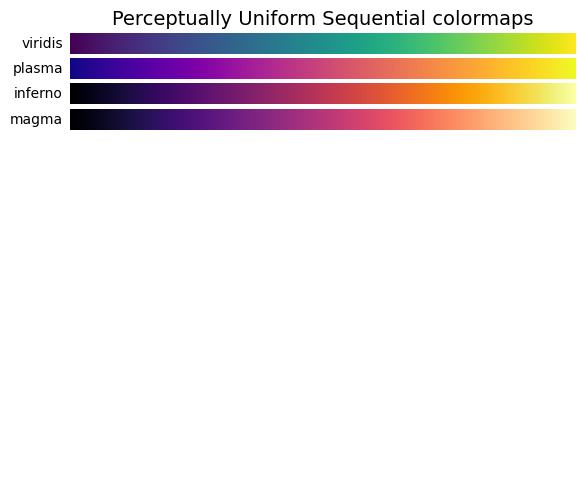

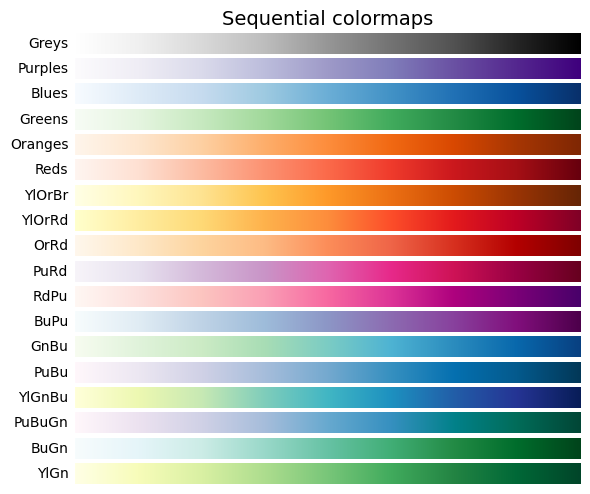

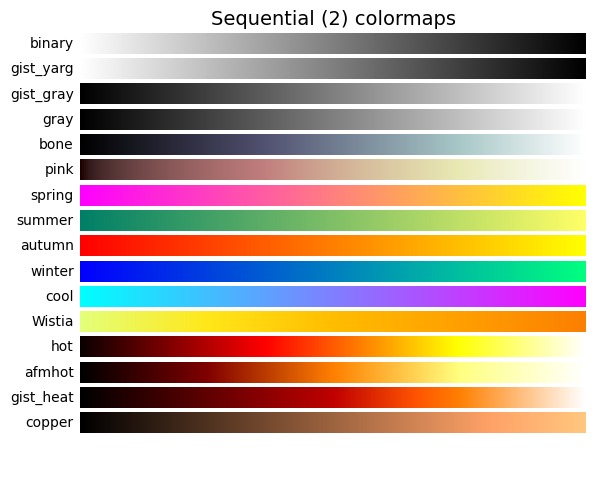

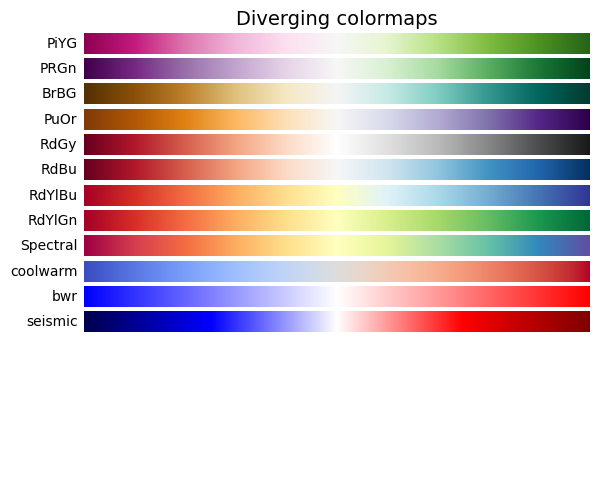

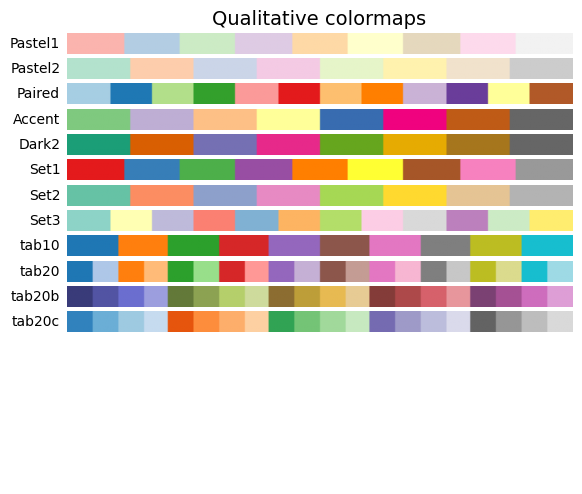

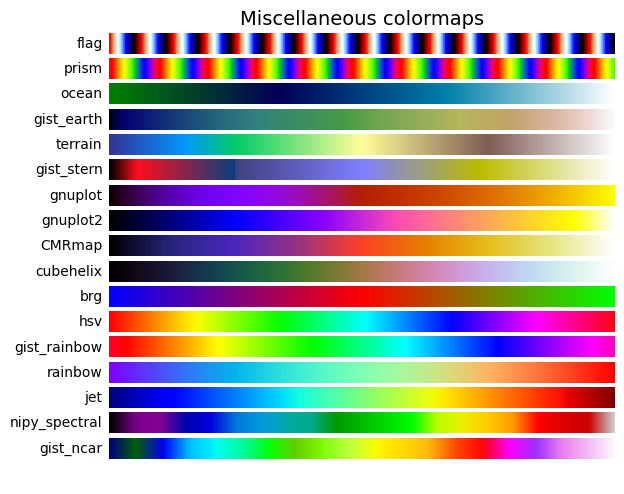

In [16]:
# Call the function for each colormap category, and plot the colormaps
for cmap_category, cmap_list in cmaps:
    #use the function defined above
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

When colormaps are created in mpl, they get "registered" with a name. This allows one to specify a colormap to use by name.

Try some of the other colormaps above!

z data shape: (10, 10)


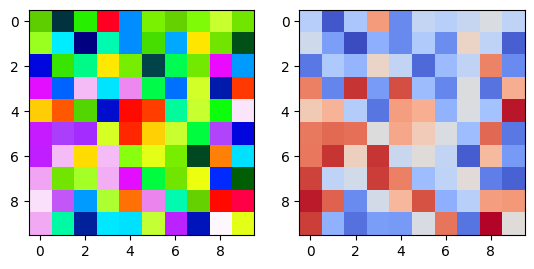

In [ ]:
#make some data in a 10x10 array
z = np.random.random((10, 10))
print('z data shape:', z.shape)

#make a simple subplot with two images using imshow and different colormaps
# red dashes, blue squares and green triangles
fig, ax = plt.subplots(1, 2) # create 1 row, 2 columns of subplots
ax[0].imshow(z, 
             interpolation='none', # no interpolation between pixels
             cmap='gray' # use the gray colormap
             )
ax[1].imshow(z, 
             interpolation='none', # no interpolation between pixels
             cmap='coolwarm' # use the coolwarm colormap
             )
plt.show()

Next Section: [Part 5: Limits Legends and Layouts](Part5-Limits_Legends_and_Layouts.ipynb)